# การแก้ปัญหากำหนดการเชิงเส้นผ่านโมดูล Numpy

เขียนโดย รองศาสตราจารย์ ดร. กรุง สินอภิรมย์สราญ  
วันที่ 15 กุมภาพันธ์ 2566

In [2]:
# เริ่มจากการเรียกใช้โมดูล numpy
import numpy as np

## ๑. วิธีซิมเพล็กซ์แบบพีชคณิต

การหาผลเฉลยที่เหมาะที่สุดของปัญหากำหนดการเชิงเส้น 

รูปแบบปัญหากำหนดการเชิงเส้นแบบมาตรฐาน

$$\begin{array}{ll}\mbox{Minimize} & c^T x \\ \mbox{subject to} & A x = b \\ & x \ge 0\end{array}$$

**วิธีซิมเพล็กซ์จากรูปแบบมาตรฐาน (Standard simplex method)**

**ขั้นเริ่มต้น** กำหนด เบสิส $B$ โดยที่ $I_B$ แทนเซตของของตัวแปรดัชนีพื้นฐาน และ $I_N$ แทนเซตของตัวแปรดัชนีไม่พื้นฐาน

**ขั้นที่ 1** หาผลเฉลยของระบบ $B x_B = b$ ได้ว่า $x_B = B^{-1} b = \bar{b}$ และ $z = c_B^T B^{-1} b$.  

**ขั้นที่ 2** หาผลเฉลยของระบบ $w^T B = c_B^T$.  

**ขั้นที่ 3** คำนวณ $z_j = w^T A_{:,j}, \forall j \in I_N$.

**ขั้นที่ 4** $z_k - c_k = max\{z_j - c_j | j \in I_N\}$ หาดัชนี k ตามหลักเกณฑ์ Dangzig

**ขั้นที่ 5** ถ้า $z_k - c_k \le 0$ แล้ว ผลเฉลยที่เป็นไปได้พื้นฐาน (BFS = Basic Feasible Solution) เป็นผลเฉลยที่เหมาะที่สุด และหยุด

**ขั้นที่ 6** หาผลเฉลยของระบบ $B y_k = A_{:k}$

**ขั้นที่ 7** ถ้า $y_k \le 0$ แล้ว ปัญหากำหนดการเชิงเส้นมีผลเฉลยที่ค่าที่เหมาะที่สุดไม่มีขอบ และหยุด

**ขั้นที่ 8** คำนวณ $\displaystyle\frac{\bar{b}_r}{y_{kr}} = min\{\frac{\bar{b}_i}{y_{ki}} | y_{ki} > 0 \}$

**Step 9** สลับตัวแปรไม่พื้นฐาน $x_k$ กับตัวแปรพื้นฐาน $x_r$, แล้วกลับไปที่ **ขั้นที่ 1**

In [5]:
def simplexAlgebra(c, b, A, I_B, I_N, maxIT=10):
  '''simplexMethod solve
        Minimize   c^T x
        subject to Ax = b
                   x >= 0
    Input:c is the cost coefficient
          b is the RHS vector
          A is the technological coefficients
    Output: status = -1, 0, 1 where -1 is unbounded, 0 is optimal, 1 is maxiteration reach
            x = optimal solution
            z = optimal objective value
            it = number of simplex iterations.
  '''
  it, status = 0, 1
  m, n = len(b), len(c)
  c_np = np.array(c)
  b_np = np.array(b)
  A_np = np.array(A)
  x_np = np.zeros(n)
  print('Simplex method:')
  while(status == 1):
    print('Iteration:', it)
    print('Index of basic and nonbasic', I_B, I_N)
    ## Step 1: Solve B x_B = b
    x_np[I_B] = np.linalg.solve(A_np[:,I_B], b_np)
    z = c_np.dot(x_np)
    print('Current BFS is ', x_np)
    print('Current objective value is ', z)
    # Step 2: Solve w^T B = c_B^T
    w = np.linalg.solve(A_np[:,I_B].transpose(), c_np[I_B])
    # Step 3: Compute z_j
    zj = w.dot(A_np[:,I_N])
    # Step 4: Find maximum of z_j - c_j
    zj_cj = zj - c_np[I_N]
    ks = zj_cj.argmax()
    # Step 5: This is optimal then break
    if zj_cj[ks] <= 0:
      status = 0
      result = (0, x_np, z, it)
      return(result)
    # Step 6: Solve B y_k = A_{:,k}
    yk = np.linalg.solve(A_np[:,I_B], A_np[:,I_N[ks]])
    # Step 7: This is not unbounded LP
    if all(yk<=0):
      status = -1
      result = (-1, x_np, z, it)
      return(result)
    # Step 8: find b_r/ykr 
    byk = x_np[I_B][yk>0]/yk[yk>0]
    rs = byk.argmin(); rs
    r = np.array([v[0] for v in enumerate(yk>0) if v[1]])[rs]
    # Step 9: Swap
    I_B[r], I_N[ks] = I_N[ks], I_B[r]
    it += 1
  return(result)
    


**ปัญหา LP01**

$$\begin{array}{ll} \mbox{Minimize} & -x_1 - x_2 \\ \mbox{subject to} & x_1 + 2 x_2 \leq 4 \\ & x_2 \leq 1 \\ & x_1, x_2 \geq 0 \end{array}$$


In [13]:
# การแก้ปัญหา LP01
m1, n1 = 2, 4
c1 = [-1, -1, 0, 0]
b1 = [4, 1]
A1 = [[1, 2, 1, 0], [0, 1, 0, 1]]
simplexAlgebra(c1,b1,A1,[2,3], [0,1])

Simplex method:
Iteration: 0
Index of basic and nonbasic [2, 3] [0, 1]
Current BFS is  [0. 0. 4. 1.]
Current objective value is  0.0
Iteration: 1
Index of basic and nonbasic [0, 3] [2, 1]
Current BFS is  [4. 0. 4. 1.]
Current objective value is  -4.0


(0, array([4., 0., 4., 1.]), -4.0, 1)

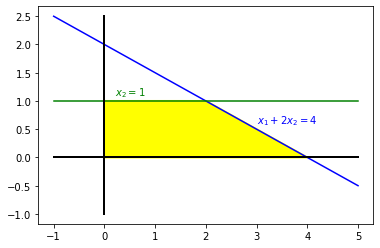

In [8]:
%matplotlib inline
import pylab as pyl
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D
x = np.linspace(-1,5, num=100)
l1 = 2 - x/2
l2 = [1]*100
a = pyl.figure().add_subplot(111)
a.add_patch(Polygon([[0,0],[4,0],[2,1],[0,1]],closed=True,fill=True,hatch='\\',color='Yellow',lw=2))
pyl.plot(x,l1,color='b'); a.text(3,0.6,"$x_1+2x_2=4$",color='b')
pyl.plot(x,l2,color='g'); a.text(0.2,1.1,"$x_2=1$",color='g')
a.add_line(Line2D([-1,5],[0,0],color='k',lw=2))
a.add_line(Line2D([0,0],[-1,2.5],color='k',lw=2))
pyl.show()

**ปัญหา LP02** $$\begin{array}{ll}\mbox{Maximize} & 2 x_1 - x_2 - 2 x_3 \\ \mbox{subject to} & x_1 - x_2 + 2 x_3 \le 7 \\ & x_1 - 4 x_3 \le 4 \\ & x_1, x_2, x_3 \ge 0\end{array}$$

แปลงเป็นรูปแบบมาตรฐาน

$$\begin{array}{ll}\mbox{Minimize} & -2 x_0 + x_1 + 2 x_2 + 0 x_3 + 0 x_4\\ \mbox{subject to} & x_0 - x_1 + 2 x_2 + x_3 = 7 \\ & x_0 - 4 x_2 + x_4 = 4 \\ & x_0, x_1, x_2, x_3, x_4 \ge 0\end{array}$$



In [14]:
## การแก้ปัญหา LP02
m2, n2 = 2, 5
c2 = [-2, 1, 2, 0, 0]
b2 = [7,4]
A2 = [[1, -1, 2, 1, 0], [1, 0, -4, 0, 1]]
simplexAlgebra(c2,b2,A2, [3,4], [0, 1, 2])

Simplex method:
Iteration: 0
Index of basic and nonbasic [3, 4] [0, 1, 2]
Current BFS is  [0. 0. 0. 7. 4.]
Current objective value is  0.0
Iteration: 1
Index of basic and nonbasic [3, 0] [4, 1, 2]
Current BFS is  [4. 0. 0. 3. 4.]
Current objective value is  -8.0
Iteration: 2
Index of basic and nonbasic [2, 0] [4, 1, 3]
Current BFS is  [6.  0.  0.5 3.  4. ]
Current objective value is  -11.0


(0, array([6. , 0. , 0.5, 3. , 4. ]), -11.0, 2)

**ปัญหา LP03** $$\begin{array}{ll}\mbox{Maximize} & 10 x_1 + 5 x_2 + 2 x_3 - 3 x_4 \\ \mbox{subject to} & x_2 - x_3 + 4 x_4 \le 5 \\ & 4 x_1 + 3 x_2 + x_3 - 2 x_4 \le 5 \\ & 2 x_1 - x_2 + 2 x_3 + x_4 \le 2 \\ & x_1, x_2, x_3, x_4 \ge 0\end{array}$$

แปลงเป็นรูปแบบมาตรฐาน

$$\begin{array}{ll}\mbox{Minimize} & -10 x_1 - 5 x_2 - 2 x_3 + 3 x_4 + 0 x_5 + 0 x_6 + 0 x_7 \\ \mbox{subject to} & x_2 - x_3 + 4 x_4 + x_5 = 5 \\ & 4 x_1 + 3 x_2 + x_3 - 2 x_4 + x_6 = 5 \\ & 2 x_1 - x_2 + 2 x_3 + x_4 + x_7 = 2 \\ & x_1, x_2, x_3, x_4, x_5, x_6, x_7 \ge 0\end{array}$$



In [15]:
## การแก้ปัญหา LP03 
m3, n3 = 3, 6
c3 = [-10, -5, -2, 3, 0, 0,0]
b3 = [5,5,2]
A3 = [[0, 1, -1, 4, 1, 0,0], [4, 3, 1, -2, 0, 1,0],[2,-1,2,1,0,0,1]]
simplexAlgebra(c3,b3,A3, [4,5,6], [0,1,2,3])

Simplex method:
Iteration: 0
Index of basic and nonbasic [4, 5, 6] [0, 1, 2, 3]
Current BFS is  [0. 0. 0. 0. 5. 5. 2.]
Current objective value is  0.0
Iteration: 1
Index of basic and nonbasic [4, 5, 0] [6, 1, 2, 3]
Current BFS is  [1. 0. 0. 0. 5. 1. 2.]
Current objective value is  -10.0
Iteration: 2
Index of basic and nonbasic [4, 1, 0] [6, 5, 2, 3]
Current BFS is  [1.1 0.2 0.  0.  4.8 1.  2. ]
Current objective value is  -12.0


(0, array([1.1, 0.2, 0. , 0. , 4.8, 1. , 2. ]), -12.0, 2)

## ๒. วิธีซิมเพล็กซ์แบบตาราง

การหาผลเฉลยที่เหมาะที่สุดของปัญหากำหนดการเชิงเส้น 

รูปแบบปัญหากำหนดการเชิงเส้นแบบมาตรฐาน

$$\begin{array}{ll}\mbox{Minimize} & c^T x \\ \mbox{subject to} & A x = b \\ & x \ge 0\end{array}$$

**วิธีซิมเพล็กซ์จากรูปแบบมาตรฐาน (Standard simplex method)**

**ขั้นเริ่มต้น** กำหนด เบสิส $B$ โดยที่ $I_B$ แทนเซตของของตัวแปรดัชนีพื้นฐาน และ $I_N$ แทนเซตของตัวแปรดัชนีไม่พื้นฐาน

**ขั้นที่ 1** หาผลเฉลยของระบบ $B x_B = b$ ได้ว่า $x_B = B^{-1} b = \bar{b}$ และ $z = c_B^T B^{-1} b$.  

**ขั้นที่ 2** หาผลเฉลยของระบบ $w^T B = c_B^T$.  

**ขั้นที่ 3** คำนวณ $z_j = w^T A_{:,j}, \forall j \in I_N$.

**ขั้นที่ 4** $z_k - c_k = max\{z_j - c_j | j \in I_N\}$ หาดัชนี k ตามหลักเกณฑ์ Dangzig

**ขั้นที่ 5** ถ้า $z_k - c_k \le 0$ แล้ว ผลเฉลยที่เป็นไปได้พื้นฐาน (BFS = Basic Feasible Solution) เป็นผลเฉลยที่เหมาะที่สุด และหยุด

**ขั้นที่ 6** หาผลเฉลยของระบบ $B y_k = A_{:k}$

**ขั้นที่ 7** ถ้า $y_k \le 0$ แล้ว ปัญหากำหนดการเชิงเส้นมีผลเฉลยที่ค่าที่เหมาะที่สุดไม่มีขอบ และหยุด

**ขั้นที่ 8** คำนวณ $\displaystyle\frac{\bar{b}_r}{y_{kr}} = min\{\frac{\bar{b}_i}{y_{ki}} | y_{ki} > 0 \}$

**Step 9** สลับตัวแปรไม่พื้นฐาน $x_k$ กับตัวแปรพื้นฐาน $x_r$, แล้วกลับไปที่ **ขั้นที่ 1**

**ตารางซิมเพล็กซ์ (Simplex tableau)**


| &nbsp; | $x_B$ | $x_N$ | RHS |
|--------|-------|-------|-----|
| row 0  | 0 | $c_B^T B^{-1} N - c_N^T$ | $c_B^T B^{-1} b$ |
| $x_B$  | $I$ | $B^{-1} N$ | $B^{-1} b$ |


In [11]:
def showTableau(tableau):
  print('-'*25)
  print(tableau[0])
  print('-'*25)
  for i in range(1, len(tableau)):
    print(tableau[i])
  print('-'*25)

In [12]:
def simplexTableau(c, b, A, I_B, maxIT=5):
  '''simplexMethod solve
        Minimize   c^T x
        subject to Ax = b
                   x >= 0
    Input:c is the cost coefficient
          b is the RHS vector
          A is the technological coefficients
          I_B is the current basic indices
    Output: status = -1, 0, 1 where -1 is unbounded, 0 is optimal, 1 is maxiteration reach
            tableau = the current tableau
            I_B = index of basic variables
            it = number of simplex iterations.
  '''
  it, status = 0, 1
  m, n = len(b), len(c)
  tableau = [[-v for v in c]+[0]]+[A[j]+[b[j]] for j in range(m)]
  result = (status, tableau, I_B, it)
  print('Simplex method:')
  while(it < maxIT):
    print('Iteration:', it)
    print('Index of basic', I_B)
    showTableau(tableau)

    ## Step 1&2&3&4
    zkck = max(enumerate([tableau[0][i] for i in range(n)]), key=lambda x:x[1])
    k = zkck[0]
    # Step 5: This is optimal then break
    if zkck[1] <= 0:
      status = 0
      result = (0, tableau, I_B, it)
      return(result)
    # Step 6: Solve B y_k = A_{:,k}
    yk = [tableau[j+1][k] for j in range(m)]

    # Step 7: This is not unbounded LP
    if all([v<=0 for v in yk]):
      status = -1
      result = (-1, tableau, I_B, it)
      return(result)
    # Step 8: find b_r/ykr
    brykr = min([(j,tableau[j+1][n]/yk[j]) for j in range(m) if yk[j]>0], key=lambda x: x[1])
    
    r = brykr[0]+1
    p = tableau[r][k]
    print("entering ", k, ' exiting ', r, ' pivot ', p)
    for j in range(m+1):
      if j != r:
        tableau[j] = [tableau[j][i]-tableau[j][k]*tableau[r][i]/p for i in range(len(tableau[j]))]
    tableau[r] = [v/p for v in tableau[r]]
    # Step 9: Swap
    I_B[r-1] = k
    it += 1
  return(result)
    


In [17]:
# การแก้ปัญหา LP01
simplexTableau(c1,b1,A1,[2,3])

Simplex method:
Iteration: 0
Index of basic [2, 3]
-------------------------
[1, 1, 0, 0, 0]
-------------------------
[1, 2, 1, 0, 4]
[0, 1, 0, 1, 1]
-------------------------
entering  0  exiting  1  pivot  1
Iteration: 1
Index of basic [0, 3]
-------------------------
[0.0, -1.0, -1.0, 0.0, -4.0]
-------------------------
[1.0, 2.0, 1.0, 0.0, 4.0]
[0.0, 1.0, 0.0, 1.0, 1.0]
-------------------------


(0,
 [[0.0, -1.0, -1.0, 0.0, -4.0],
  [1.0, 2.0, 1.0, 0.0, 4.0],
  [0.0, 1.0, 0.0, 1.0, 1.0]],
 [0, 3],
 1)

In [18]:
# การแก้ปัญหา LP02
simplexTableau(c2,b2,A2,[3,4])

Simplex method:
Iteration: 0
Index of basic [3, 4]
-------------------------
[2, -1, -2, 0, 0, 0]
-------------------------
[1, -1, 2, 1, 0, 7]
[1, 0, -4, 0, 1, 4]
-------------------------
entering  0  exiting  2  pivot  1
Iteration: 1
Index of basic [3, 0]
-------------------------
[0.0, -1.0, 6.0, 0.0, -2.0, -8.0]
-------------------------
[0.0, -1.0, 6.0, 1.0, -1.0, 3.0]
[1.0, 0.0, -4.0, 0.0, 1.0, 4.0]
-------------------------
entering  2  exiting  1  pivot  6.0
Iteration: 2
Index of basic [2, 0]
-------------------------
[0.0, 0.0, 0.0, -1.0, -1.0, -11.0]
-------------------------
[0.0, -0.16666666666666666, 1.0, 0.16666666666666666, -0.16666666666666666, 0.5]
[1.0, -0.6666666666666666, 0.0, 0.6666666666666666, 0.33333333333333337, 6.0]
-------------------------


(0,
 [[0.0, 0.0, 0.0, -1.0, -1.0, -11.0],
  [0.0,
   -0.16666666666666666,
   1.0,
   0.16666666666666666,
   -0.16666666666666666,
   0.5],
  [1.0,
   -0.6666666666666666,
   0.0,
   0.6666666666666666,
   0.33333333333333337,
   6.0]],
 [2, 0],
 2)

In [19]:
## การแก้ปัญหา LP03 
simplexTableau(c3,b3,A3, [4,5,6])

Simplex method:
Iteration: 0
Index of basic [4, 5, 6]
-------------------------
[10, 5, 2, -3, 0, 0, 0, 0]
-------------------------
[0, 1, -1, 4, 1, 0, 0, 5]
[4, 3, 1, -2, 0, 1, 0, 5]
[2, -1, 2, 1, 0, 0, 1, 2]
-------------------------
entering  0  exiting  3  pivot  2
Iteration: 1
Index of basic [4, 5, 0]
-------------------------
[0.0, 10.0, -8.0, -8.0, 0.0, 0.0, -5.0, -10.0]
-------------------------
[0.0, 1.0, -1.0, 4.0, 1.0, 0.0, 0.0, 5.0]
[0.0, 5.0, -3.0, -4.0, 0.0, 1.0, -2.0, 1.0]
[1.0, -0.5, 1.0, 0.5, 0.0, 0.0, 0.5, 1.0]
-------------------------
entering  1  exiting  2  pivot  5.0
Iteration: 2
Index of basic [4, 1, 0]
-------------------------
[0.0, 0.0, -2.0, 0.0, 0.0, -2.0, -1.0, -12.0]
-------------------------
[0.0, 0.0, -0.4, 4.8, 1.0, -0.2, 0.4, 4.8]
[0.0, 1.0, -0.6, -0.8, 0.0, 0.2, -0.4, 0.2]
[1.0, 0.0, 0.7, 0.09999999999999998, 0.0, 0.1, 0.3, 1.1]
-------------------------


(0,
 [[0.0, 0.0, -2.0, 0.0, 0.0, -2.0, -1.0, -12.0],
  [0.0, 0.0, -0.4, 4.8, 1.0, -0.2, 0.4, 4.8],
  [0.0, 1.0, -0.6, -0.8, 0.0, 0.2, -0.4, 0.2],
  [1.0, 0.0, 0.7, 0.09999999999999998, 0.0, 0.1, 0.3, 1.1]],
 [4, 1, 0],
 2)

[1.] Use the Simplex method to find the solution of the following linear programming model.  
$$\begin{array}{ll} \mbox{Minimize} & -2 x_1 - x_3 - 3 x_4 \\ \mbox{subject to} & 2 x_1 - x_2 + 2 x_3 \le 4 \\ & x_1 - 2 x_4 \le 2 \\ & x_2 - x_3 + 2 x_4 \le 8 \\ & x_1, x_2, x_3, x_4 \ge 0\end{array}$$  
Convert into the standard form  
$$\begin{array}{ll} \mbox{Minimize} & -2 x_1 + 0 x_2 - x_3 - 3 x_4 + 0 x_5 + 0 x_6 + 0 x_7 \\ \mbox{subject to} & 2 x_1 - x_2 + 2 x_3 + 0 x_4 + x_5 = 2 \\ & x_1 + 0 x_2 + 0 x_3 - 2 x_4 + x_6 = 2 \\ & 0 x_1 + x_2 - x_3 + 2 x_4 + x_7 = 8 \\ & x_1, x_2, x_3, x_4, x_5, x_6, x_7 \geq 0\end{array}$$  
Initial tableau  

|       | $x_1$ | $x_2$ | $x_3$ | $x_4$ | $x_5$ | $x_6$ | $x_7$ | RHS
|-------|-------|-------|-------|-------|-------|-------|-------|-----
| row0  |   2   |   0   |   1   | **3** |   0   |   0   |   0   |  0 
| $x_5$ |   2   |  -1   |   2   |   0   |   1   |   0   |   0   |  4
| $x_6$ |   1   |   0   |   0   |  -2   |   0   |   1   |   0   |  2
| $x_7$ |   0   |   1   |  -1   | __2__ |   0   |   0   |   1   |  8

Tableau 1

|       | $x_1$ | $x_2$ | $x_3$ | $x_4$ | $x_5$ | $x_6$ | $x_7$ | RHS
|-------|-------|-------|-------|-------|-------|-------|-------|-----
| row0  |   2   | -3/2  |**5/2**|   0   |   0   |   0   | -3/2  |  -12 
| $x_5$ |   2   |  -1   | __2__ |   0   |   1   |   0   |   0   |  4
| $x_6$ |   1   |   1   |  -1   |   0   |   0   |   1   |   1   |  10
| $x_4$ |   0   |  1/2  | -1/2  |   1   |   0   |   0   |  1/2  |  4

Tableau 2

|       | $x_1$ | $x_2$ | $x_3$ | $x_4$ | $x_5$ | $x_6$ | $x_7$ | RHS
|-------|-------|-------|-------|-------|-------|-------|-------|-----
| row0  | -1/2  | -1/4  |   0   |   0   |   0   |   0   | -3/2  |  -17 
| $x_3$ |   1   | -1/2  |   1   |   0   |  1/2  |   0   |   0   |  2
| $x_6$ |   2   |  1/2  |   0   |   0   |  1/2  |   1   |   1   |  12
| $x_4$ |  1/2  |  1/4  |   0   |   1   |  1/4  |   0   |  1/2  |  5


The optimal solution is $z$ = -17 with $x_1 = x_2 = 0$ and $x_3$ = 2, $x_4$ = 5.